In [1]:
import sys
import os

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

import ccal

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['figure.max_open_warning'] = 200

HOME_DIR = os.environ['HOME']
CCLE_DIR = os.path.join(HOME_DIR, 'data', 'ccle')

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


In [ ]:
n_features = 3
feature_indices = list(range(n_features))

feature_bundle = [['Variant', variant_filepath, 'binary', False, 0, feature_indices, []],
                  ['Gene Dependency', gene_dependency_filepath, 'continuous', True, 0, feature_indices, []],
                  ['Gene Expression', gene_expression_filepath, 'continuous', False, 0, feature_indices, []],
                  ['Pathway Expression', pathway_expression_filepath, 'continuous', False, 0, feature_indices, []],
                  ['Protein Expression', protein_expression_filepath, 'continuous', False, 0, feature_indices, []],
                  ['Pathology',  pathology_filepath, 'binary', False, 0, [], []],
                  ['Phenotype', phenotype_filepath, 'binary', False, 0, feature_indices, []],
                  ['Drug Sensitivity', drug_dependency_filepath, 'continuous', True, 0, feature_indices, []]]

h_matrix = ccal.read_gct('data/nmf_k9_h.gct')
component = 9
target_bundle = [['H Matrix', h_matrix, 'continuous', False, 0, component, 'Component {}'.format(component)]]



# Read test data

In [2]:
h_matrix = ccal.read_gct('data/nmf_k9_h.gct')

In [3]:
variant_filepath = os.path.join(CCLE_DIR, 'ccle_variants.gct')
gene_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_gene_dependencies.gct')
gene_expression_filepath = os.path.join(CCLE_DIR, 'ccle_gene_expressions.gct')
pathway_expression_filepath = os.path.join(CCLE_DIR, 'ccle_pathway_expressions.gct')
protein_expression_filepath = os.path.join(CCLE_DIR, 'ccle_protein_expressions.gct')
pathology_filepath = os.path.join(CCLE_DIR, 'ccle_pathologies.gct')
phenotype_filepath = os.path.join(CCLE_DIR, 'ccle_phenotypes.gct')
drug_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_drug_sensitivities.gct')

variant_df = ccal.read_gct(variant_filepath)
gene_dependency_df = ccal.read_gct(gene_dependency_filepath)
gene_expression_df = ccal.read_gct(gene_expression_filepath)
pathway_expression_df = ccal.read_gct(pathway_expression_filepath)
protein_expression_df = ccal.read_gct(protein_expression_filepath)
pathology_df = ccal.read_gct(pathology_filepath)
phenotype_df = ccal.read_gct(phenotype_filepath)
drug_dependency_df = ccal.read_gct(drug_dependency_filepath)

# Test make_association_panels

## Make target bundle

In [8]:
component = 9
target_bundle = [['H Matrix', h_matrix, 'continuous', False, 0, component, 'Component {}'.format(component)]]

## Make feature bundles

In [6]:
feature_bundles = {}

n_features = 100
feature_indices = list(range(n_features))

feature_bundles['features=filepath'] = [['Variant', variant_filepath, 'binary', False, 0, feature_indices, []],
                                        ['Gene Dependency', gene_dependency_filepath, 'continuous', True, 0, feature_indices, []],
                                        ['Gene Expression', gene_expression_filepath, 'continuous', False, 0, feature_indices, []],
                                        ['Pathway Expression', pathway_expression_filepath, 'continuous', False, 0, feature_indices, []],
                                        ['Protein Expression', protein_expression_filepath, 'continuous', False, 0, feature_indices, []],
                                        ['Pathology',  pathology_filepath, 'binary', False, 0, [], []],
                                        ['Phenotype', phenotype_filepath, 'binary', False, 0, feature_indices, []],
                                        ['Drug Sensitivity', drug_dependency_filepath, 'continuous', True, 0, feature_indices, []]]

feature_bundles['features=df'] = [['Variant', variant_df, 'binary', False, 0, feature_indices, []],
                                  ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, feature_indices, []],
                                  ['Gene Expression', gene_expression_df, 'continuous', False, 0, feature_indices, []],
                                  ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, feature_indices, []],
                                  ['Protein Expression', protein_expression_df, 'continuous', False, 0, feature_indices, []],
                                  ['Pathology',  pathology_df, 'binary', False, 0, [], []],
                                  ['Phenotype', phenotype_df, 'binary', False, 0, feature_indices, []],
                                  ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, feature_indices, []]]

feature_aliases = ['Feature {}'.format(f) for f in feature_indices]
feature_bundles['feature_aliases'] = [['Variant', variant_df, 'binary', False, 0, feature_indices, feature_aliases],
                                      ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, feature_indices, feature_aliases],
                                      ['Gene Expression', gene_expression_df, 'continuous', False, 0, feature_indices, feature_aliases],
                                      ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, feature_indices, feature_aliases],
                                      ['Protein Expression', protein_expression_df, 'continuous', False, 0, feature_indices, feature_aliases],
                                      ['Pathology',  pathology_df, 'binary', False, 0, [], feature_aliases],
                                      ['Phenotype', phenotype_df, 'binary', False, 0, feature_indices, feature_aliases],
                                      ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, feature_indices, feature_aliases]]

## Test

<133609> Loading targets bundle ...
<133609> Reading H Matrix ...
<133609> 	Data: <class 'pandas.core.frame.DataFrame'>.
<133609> 	Data type: continuous.
<133609> 	Is ascending: False.
<133609> 	Index axis: 0.
<133609> 	Index: 9.
<133609> 	Index alias: Component 9.
<133609> 	Read 1 features & 750 samples.
<133609> Loading feature bundle ...
<133609> Reading Variant ...
<133609> 	Data: <class 'pandas.core.frame.DataFrame'>.
<133609> 	Data type: binary.
<133609> 	Is ascending: False.
<133609> 	Index axis: 0.
<133609> 	Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99].
<133609> 	Index alias: [].
<133609> 	Read 100 features & 1030 samples.
<133609>

KeyboardInterrupt: 

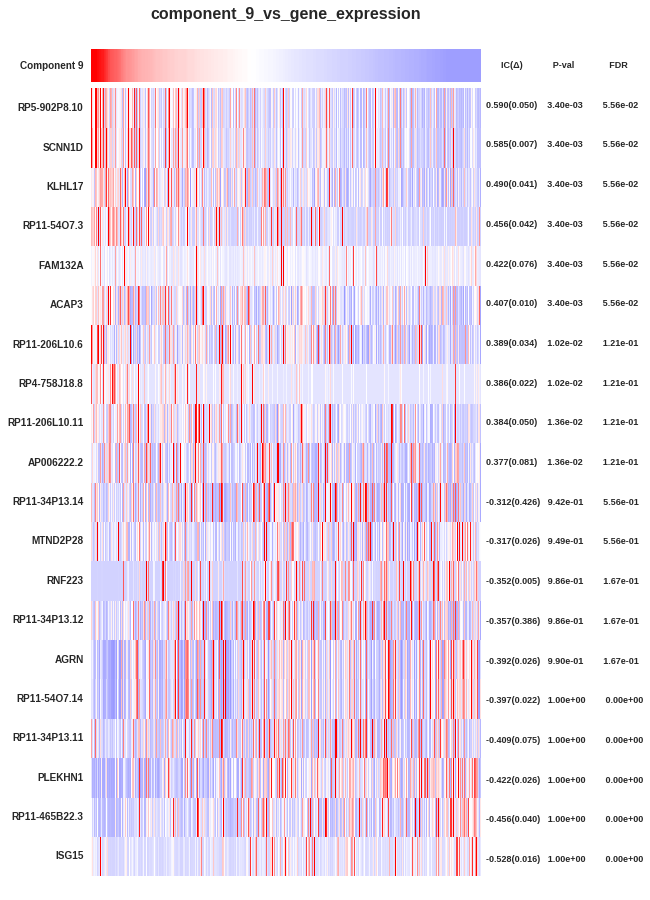

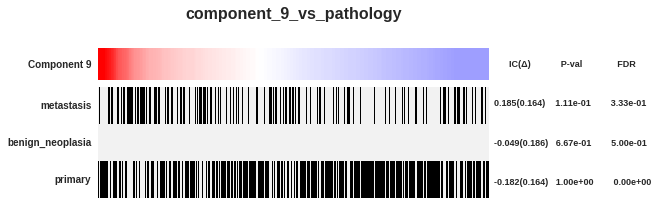

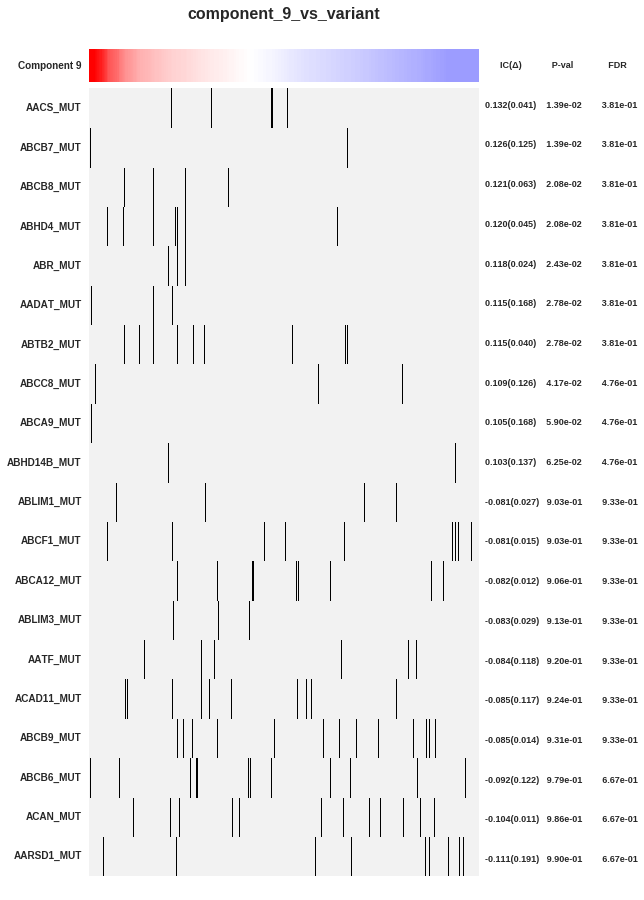

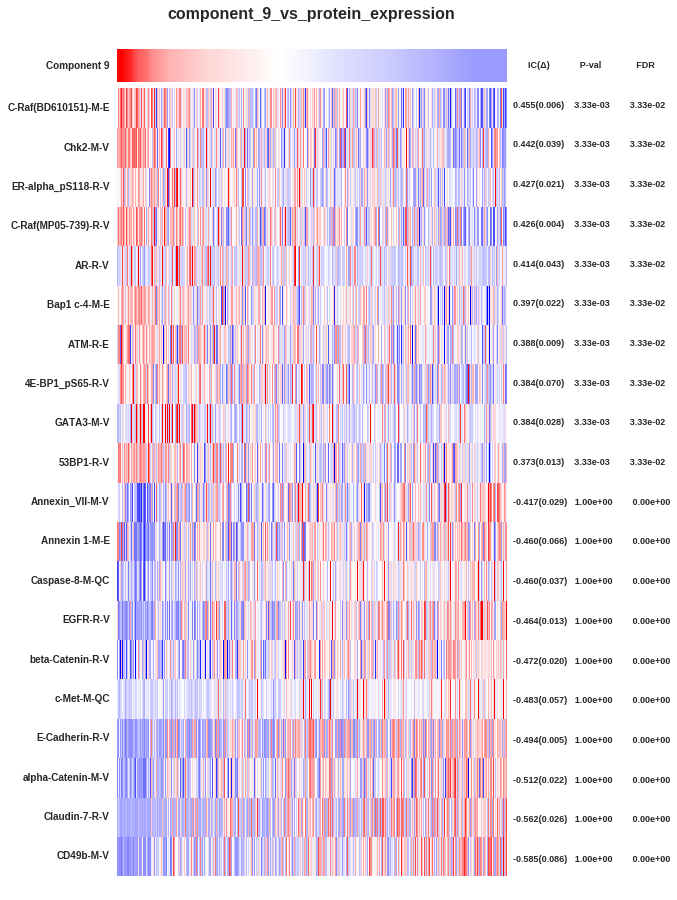

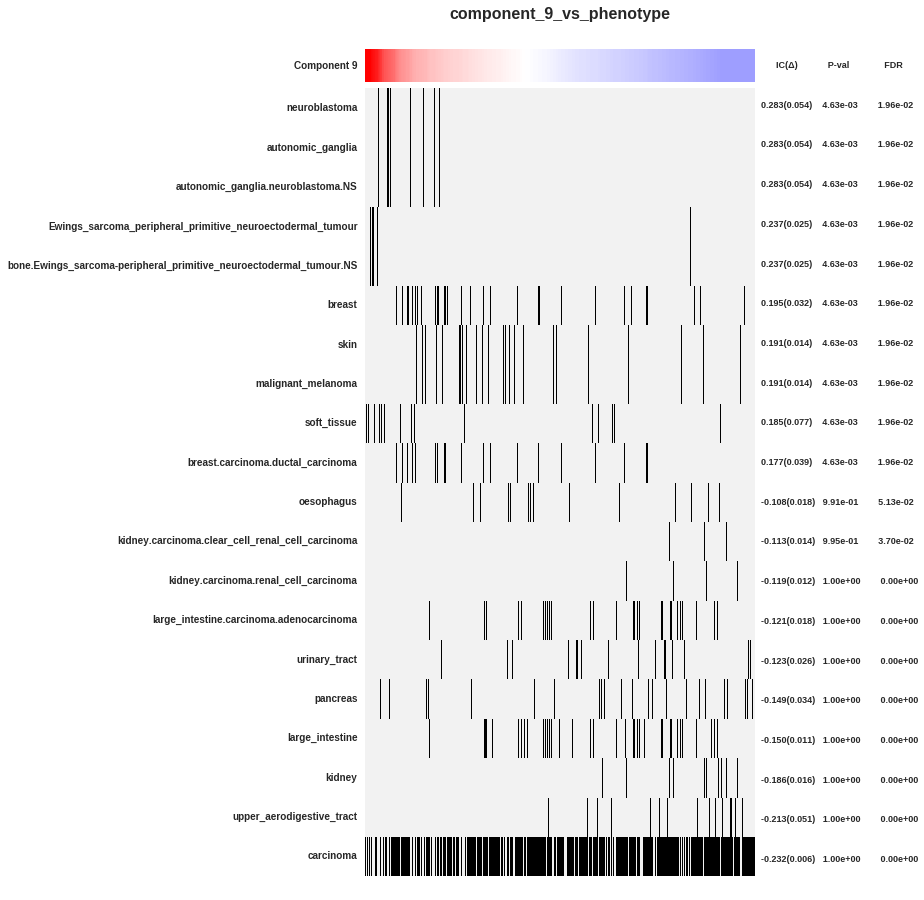

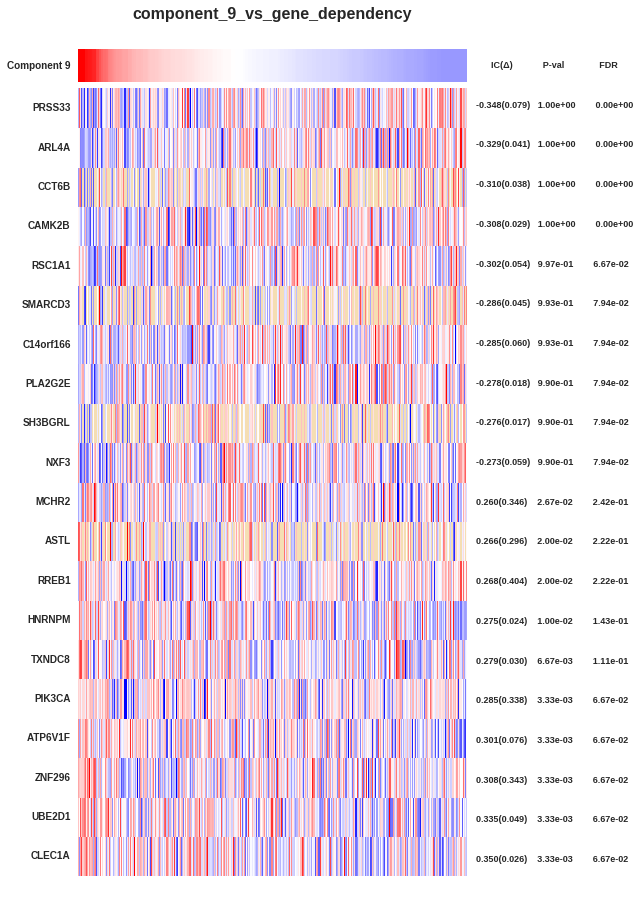

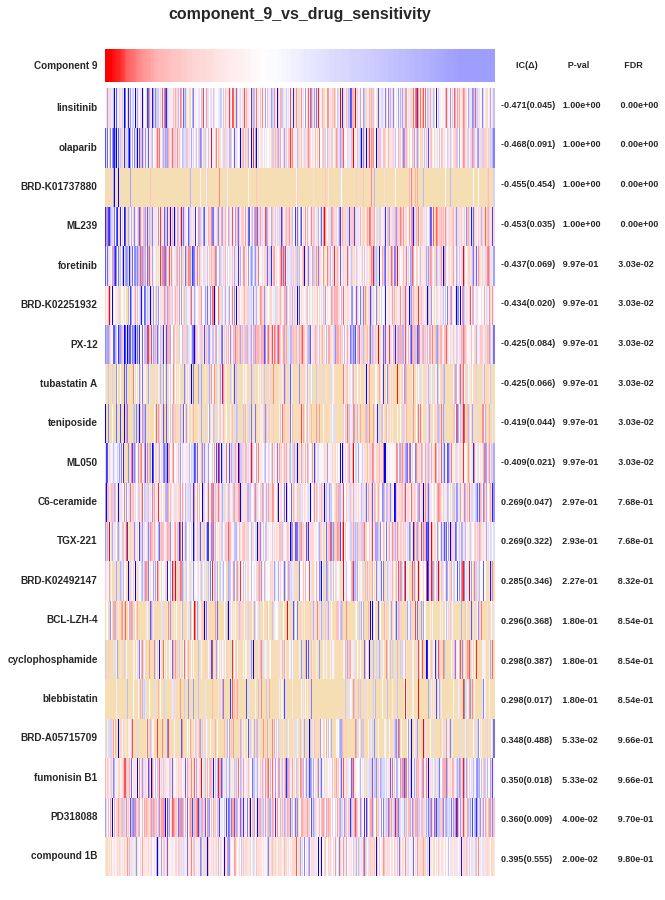

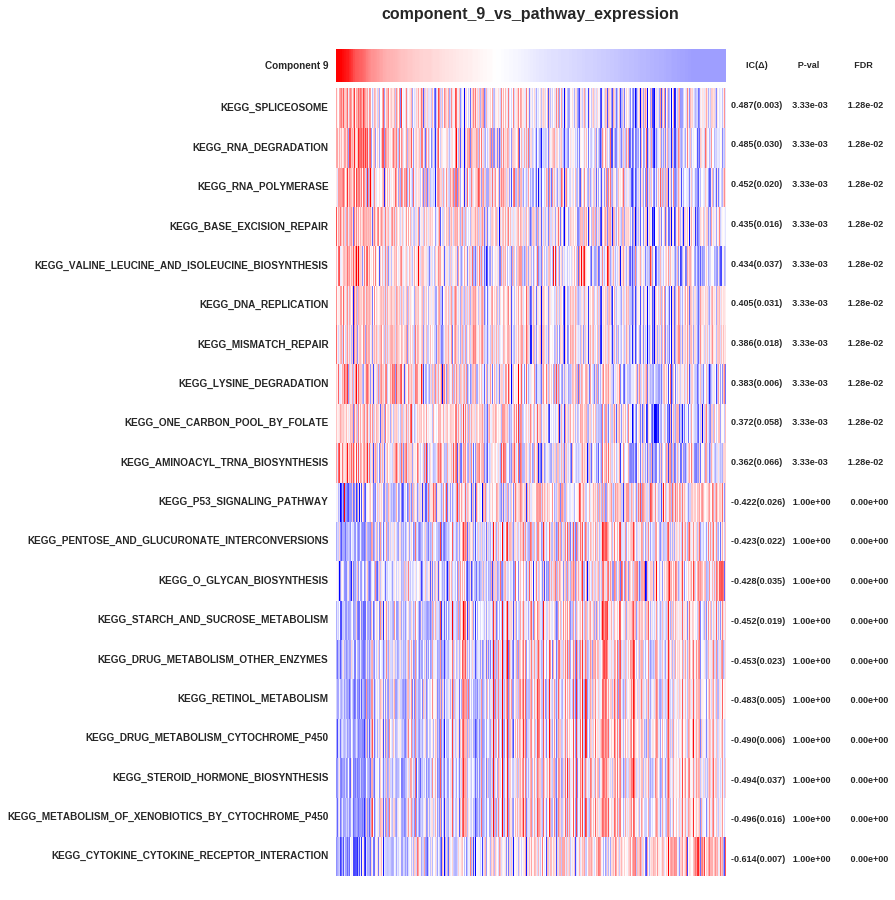

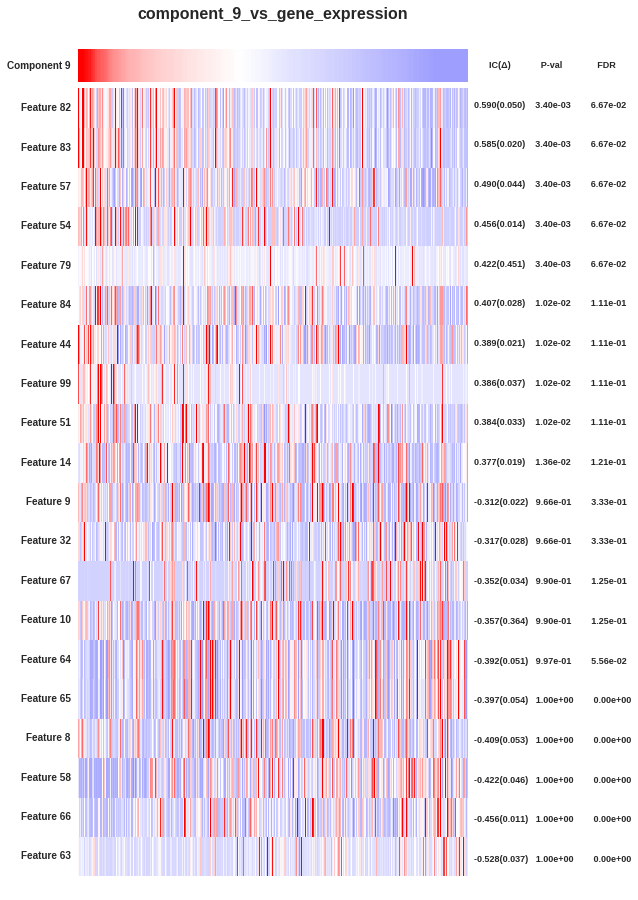

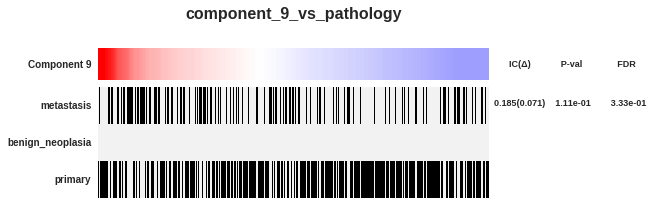

In [7]:
for feature_bundle_name, feature_bundle in feature_bundles.items():
    if 'filepath' not in feature_bundle_name:
        ccal.make_association_panels(target_bundle, feature_bundle,
                                     n_features=10, n_jobs=1, n_samplings=3, n_permutations=3,
                                     dpi=10,
                                     filepath_prefix='result/make_association_panels/{}_'.format(feature_bundle_name))

# Test make_association_panel

## Test speicfic call

In [ ]:
simulated_target = ccal.support.simulate_dataframe_or_series(1, 3)
simulated_features = ccal.support.simulate_dataframe_or_series(10, 3)
target_type = 'continuous'
feature_type = 'continuous'
n_samplings = 5
n_permutations = 2
S = ccal.make_association_panel(simulated_target, simulated_features,
                                target_type=target_type, feature_type=feature_type,
                                n_samplings=n_samplings, n_permutations=n_permutations)

## Test with loop

In [ ]:
ccal.support.VERBOSE = False

# Test continuous, categorical, and binary target
for n_targert_categories in [None, 10, 2]:
    
    if n_targert_categories:
        if n_targert_categories == 2:  # Test binary category
            target_type = 'binary'
            
        elif n_targert_categories > 2:  # Test categorical category
            target_type = 'categorical'
            
    else:  # Test continuous target
        target_type = 'continuous'
        
    # Test continuous, categorical, and binary features
    for n_feature_categories in [None, 10, 2]:
        
        if n_feature_categories:
            if n_feature_categories == 2:  # Test binary features
                feature_type = 'binary'
                
            elif n_feature_categories > 2:  # Test categorical features
                feature_type = 'categorical'
                
        else:  # Test continuous features
            feature_type = 'continuous'

        # Test with varying number of features
        for n_features in [1, 2, 100]:
            
            # Test with varying number of samples
            for n_samples in [3, 100]:

                # Simualte target
                simulated_target = ccal.support.simulate_dataframe_or_series(1,
                                                                             n_samples,
                                                                             n_categories=n_targert_categories)
                
                # Simulate features
                simulated_features = ccal.support.simulate_dataframe_or_series(n_features,
                                                                               n_samples,
                                                                               n_categories=n_feature_categories)
                
                # Test varying number of parallel jobs
                for n_jobs in [1, 2, 3]:
                    
                    # Test varying numbner of samplings
                    for n_samplings in [1, 3]: 

                        # Test varying number of permutations
                        for n_permutations in [1, 3]:

                            title = '{}X{} & {}X{} @ {}jobs & {}smpl & {}perms'.format(n_features,
                                                                                       n_samples,
                                                                                       target_type[:3],
                                                                                       feature_type[:3],
                                                                                       n_jobs,
                                                                                       n_samplings,
                                                                                       n_permutations)
                            print(title)

                            # Test
                            ccal.make_association_panel(simulated_target, simulated_features,
                                                        target_type=target_type, feature_type=feature_type, 
                                                        n_samplings=n_samplings, n_permutations=n_permutations,
                                                        title=title,                                                   
                                                        filepath_prefix='result/make_association_panel/{}'.format(title))